## Random forests:
+ desde una misma base de datos se generan multiples arboles de decisión y se contrastan las predicciones de c/u

In [12]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

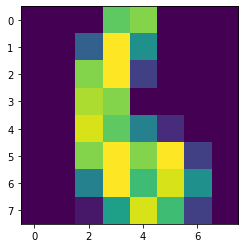

In [3]:
#con fin demostrativo
digits = load_digits()
plt.imshow(digits.images[6])
plt.show()

In [4]:
X, y = load_digits(return_X_y=True)
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

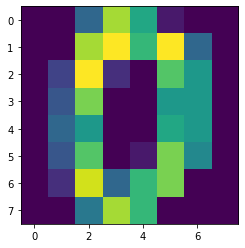

In [5]:
#tambien se puede visualizar sin el método .image
x0im = X[0].reshape(8,8)
plt.imshow(x0im)
plt.show()

In [6]:
X_tr,X_ts,y_tr,y_ts = train_test_split(X,y, test_size=0.2,random_state=0)
#test-train: 20/80

In [7]:
clf = RandomForestClassifier()
clf.fit(X_tr,y_tr)

RandomForestClassifier()

In [8]:
target_pred = clf.predict(X_ts)
print(f'prediccion: {target_pred}\nreal: {y_ts}')

prediccion: [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 0 6 5 2 5 3 4 1 7 0 6 1 5 5 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 7 7 6 7 6 5 6 0 8 1 9 8 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 3 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 3 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 5 8 5 7 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 5 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8]
real: [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 8 4

In [9]:
len([val for val in (target_pred-y_ts) if val==0])/len(target_pred)

0.9666666666666667

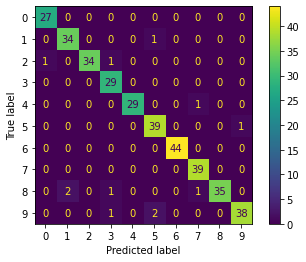

In [17]:
cm = confusion_matrix(y_ts, target_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()

In [18]:
#comparación con arbol de decisión tradicional
clf = DecisionTreeClassifier()
clf.fit(X_tr,y_tr)

DecisionTreeClassifier()

In [19]:
target_pred = clf.predict(X_ts)
#print(f'prediccion: {target_pred}\nreal: {y_ts}')

In [20]:
len([val for val in (target_pred-y_ts) if val==0])/len(target_pred)

0.8611111111111112

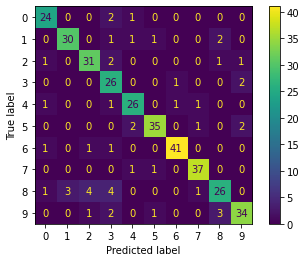

In [21]:
cm = confusion_matrix(y_ts, target_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()

## Random Forest para regresiones
Los objetos a clasificar, al buscarse un valor numérico y no una categoría, al caer en una hoja determinada tomarán el valor promedio de los elementos presentes al momento del entrenamiento.
+ Cortes en base al error cuadrático medio, se busca el valor del parámetro que produce menor error en la clasificación de entrenamiento (en cada arbol).
+ Se contrastan árboles que usan distintos valores de corte.


In [66]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

In [67]:
X,y=load_boston(return_X_y=True)

In [68]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size=0.2, random_state=0)

In [69]:
clf = RandomForestRegressor(max_depth=3,n_estimators=10)

In [70]:
clf.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=3, n_estimators=10)

In [71]:
target_pred = clf.predict(xtest)

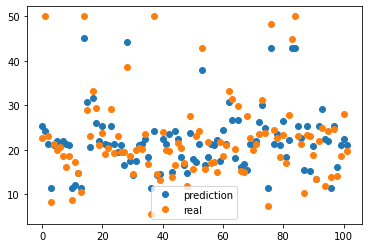

In [72]:
plt.plot(target_pred,'o',label = 'prediction')
plt.plot(ytest,'o',label='real')
plt.legend()
plt.show()

In [73]:
#MSE
mean_squared_error(ytest,target_pred)

25.644634246961253

In [74]:
#que tan seguros estamos de la calidad de esta prediccion,
#hacer una busqueda mas acabada de los hiperparametros
def model_sel(X,y):
    #grilla con las combinaciones de profundidad y estimadores y maximiza un
    #indicador de rendimiento. Se divide en 5 conjuntos el input X,y
    gsc = GridSearchCV(estimator = RandomForestRegressor(),
                      param_grid={'max_depth':range(3,7),
                          'n_estimators' : (100,500,1000,2000),},
                       cv=5, scoring = 'neg_mean_squared_error')
    grid_result = gsc.fit(X,y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params['max_depth'],
                               n_estimators=best_params['n_estimators'],
                               random_state=0).fit(X,y)
    return (rfr, best_params)
    

In [75]:
model, best_params = model_sel(xtrain,ytrain)

In [76]:
best_params

{'max_depth': 6, 'n_estimators': 100}

In [77]:
model.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=6, random_state=0)

In [78]:
target_pred2 = model.predict(xtest)

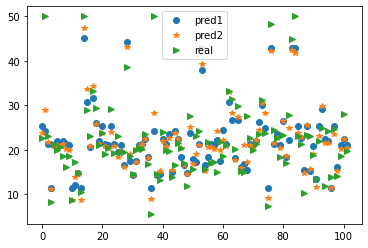

In [79]:
plt.plot(target_pred,'o',label='pred1')
plt.plot(target_pred2,'*',label='pred2')
plt.plot(ytest, '>',label='real')
plt.legend()
plt.show()

In [80]:
mean_squared_error(ytest,target_pred2)

19.25606049344271